In [3]:
# Read in the CSV into a Pandas DataFrame

import pandas as pd

df = pd.read_csv('../DATA/housing.csv')
df = df.dropna()

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20433, 10)

In [5]:
df = df.sample(frac=1,random_state=2)
train_df = df[:17000]
train_df = train_df.reset_index(drop=True)
test_df = df[17000:]
test_df = test_df.reset_index(drop=True)

train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.16,37.76,36.0,2781.0,574.0,1438.0,519.0,2.4598,155500.0,NEAR BAY
1,-119.95,36.80,30.0,1233.0,214.0,620.0,199.0,3.4297,112500.0,INLAND
2,-118.49,34.42,23.0,4166.0,756.0,2082.0,743.0,4.4107,213400.0,<1H OCEAN
3,-122.24,37.79,27.0,1632.0,492.0,1171.0,429.0,2.3173,125000.0,NEAR BAY
4,-121.45,36.86,11.0,1613.0,335.0,1617.0,342.0,3.1375,146200.0,INLAND


In [6]:
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.07,33.87,28.0,2399.0,436.0,1613.0,429.0,3.6339,220100.0,<1H OCEAN
1,-118.26,34.02,40.0,1259.0,362.0,1499.0,327.0,1.8382,126400.0,<1H OCEAN
2,-118.51,34.16,23.0,11154.0,1995.0,4076.0,1809.0,5.4609,500001.0,<1H OCEAN
3,-120.04,36.95,36.0,1528.0,347.0,1334.0,304.0,1.3594,48300.0,INLAND
4,-117.91,33.65,24.0,1494.0,494.0,814.0,459.0,2.1074,181300.0,<1H OCEAN


In [7]:
y_train = train_df['median_house_value'].to_numpy()
y_test = test_df['median_house_value'].to_numpy()

y_train.shape, y_test.shape

((17000,), (3433,))

In [8]:
#Error for Baseline model

from sklearn.metrics import mean_absolute_error

average_median_house_value = train_df['median_house_value'].mean()
baseline_model_test_predictions = [average_median_house_value] * len(test_df)

mean_absolute_error(baseline_model_test_predictions, y_test)

90952.86688447764

## 1. Dimentionality Reduction(PCA)

In [10]:
#Observing the correlation between the total_rooms,total_bedrooms and households

train_df[['total_rooms','total_bedrooms','households']].corr()

,total_rooms,total_bedrooms,households
total_rooms,1.000000,0.931023,0.918161
total_bedrooms,0.931023,1.000000,0.979402
households,0.918161,0.979402,1.000000


In [12]:
import numpy as np

X_train_3 = train_df[['total_rooms','total_bedrooms','households']]

X_train_3.shape

(17000, 3)

In [13]:
X_test_3 = test_df[['total_rooms','total_bedrooms','households']]

X_test_3.shape

(3433, 3)

In [18]:
#Getting error of Random forest training on using X_train_3,X_test_3 against Y

from sklearn.ensemble import RandomForestRegressor

forest_base = RandomForestRegressor(n_estimators=50,max_depth=5).fit(X_train_3,y_train)
forest_base_test_predictions = forest_base.predict(X_test_3)
mean_absolute_error(y_test,forest_base_test_predictions)

82165.00622766644

In [20]:
# Train PCA with 2 Feature output from X_train_3's 3 Features

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca = pca.fit(X_train_3)

pca

PCA(n_components=2)

In [21]:
X_train_pca = pca.transform(X_train_3)
X_test_pca = pca.transform(X_test_3)

X_test_pca.shape, X_train_pca.shape

((3433, 2), (17000, 2))

In [22]:
forest_pca = RandomForestRegressor(n_estimators=50,max_depth=5).fit(X_train_pca,y_train)
forest_pca_test_predictions = forest_pca.predict(X_test_pca)
mean_absolute_error(y_test,forest_pca_test_predictions)

79427.2261176727

## 2. Preprocessing / Scaling

In [23]:
X_train_3

,total_rooms,total_bedrooms,households
0,2781.0,574.0,519.0
1,1233.0,214.0,199.0
2,4166.0,756.0,743.0
3,1632.0,492.0,429.0
4,1613.0,335.0,342.0
...,...,...,...
16995,1332.0,368.0,295.0
16996,1437.0,268.0,144.0
16997,1895.0,424.0,417.0
16998,3354.0,659.0,648.0


In [24]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
import matplotlib.pyplot as plt

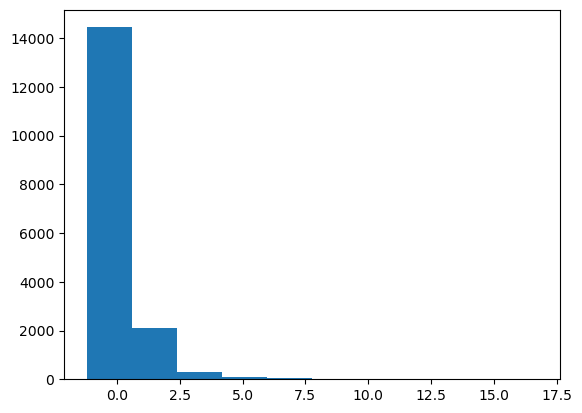

In [26]:
# Scaling X_train_3 by Z-score normalization

scaler = StandardScaler().fit(X_train_3)
X_train_scaled = scaler.transform(X_train_3)

plt.hist(X_train_scaled[:,0])
plt.show()

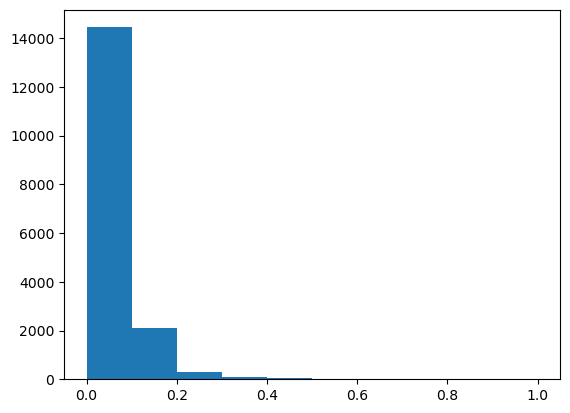

In [31]:
# Scaling X_train_3 by Min-Max method

ScalerMM = MinMaxScaler().fit(X_train_3)
X_train_scaled2 = ScalerMM.transform(X_train_3)

plt.hist(X_train_scaled2[:,0])
plt.show()

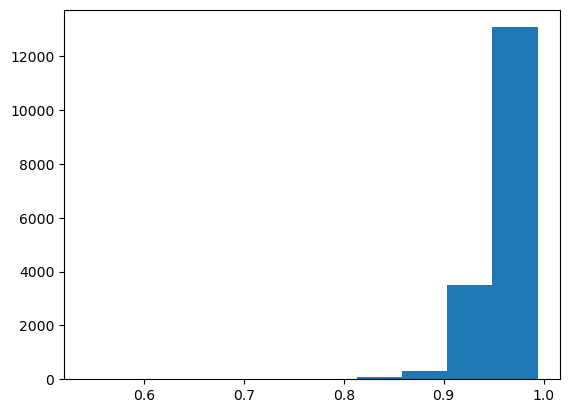

In [33]:
ScalerNorm = Normalizer().fit(X_train_3)
X_train_scaled3 = ScalerNorm.transform(X_train_3)

plt.hist(X_train_scaled3[:,0])
plt.show()

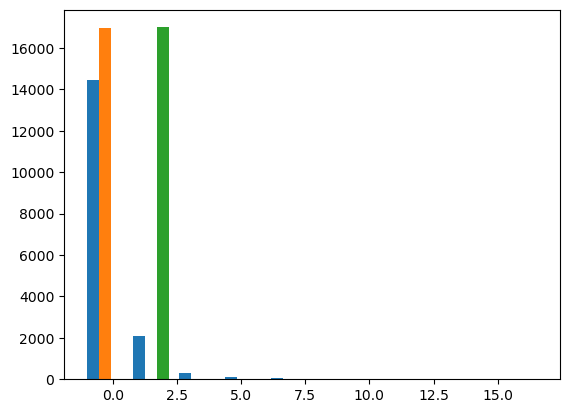

In [38]:
#Comparing the three Normalized values

plt.hist([X_train_scaled[:,0],X_train_scaled2[:,0],X_train_scaled3[:,0]])
plt.show()

In [39]:
# Preprocess X_test_3

X_test_3_scaled = scaler.transform(X_test_3)

X_test_3_scaled.shape

(3433, 3)

In [41]:
# Get error of Random Forest training on (X_train_scaled, y_train) and testing on (X_test_scaled, y_test)

random_forest_scaled = RandomForestRegressor(n_estimators=50, max_depth=5).fit(X_train_scaled, y_train)
random_forest_scaled_test_predictions = random_forest_scaled.predict(X_test_3_scaled)

mean_absolute_error(y_test, random_forest_scaled_test_predictions)

82291.30648975263

In [60]:
#Creating a PIPELINE: Scaling -> PCA -> RandomForest

from sklearn.pipeline import Pipeline

scale_pca_forest = Pipeline(steps=[('Scaler',StandardScaler()),
                                    ('PCA',PCA(n_components=2)),
                                    ('Forest',RandomForestRegressor(n_estimators=50,max_depth=5))])

scale_pca_forest

Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=2)),
                ('Forest',
                 RandomForestRegressor(max_depth=5, n_estimators=50))])

In [61]:
# Mean Absolute error of the Pipeline

scale_pca_forest.fit(X_train_3, y_train)
pipeline_test_predictions = scale_pca_forest.predict(X_test_3)

mean_absolute_error(y_test,pipeline_test_predictions)

80161.99036728061

In [62]:
# We try Normalizer for a better result

#Creating a PIPELINE: Normalizer -> PCA -> RandomForest

from sklearn.pipeline import Pipeline

Normalize_pca_forest = Pipeline(steps=[('Normalizer',Normalizer()),
                                    ('PCA',PCA(n_components=2)),
                                    ('Forest',RandomForestRegressor(n_estimators=50,max_depth=5))])

Normalize_pca_forest

Pipeline(steps=[('Normalizer', Normalizer()), ('PCA', PCA(n_components=2)),
                ('Forest',
                 RandomForestRegressor(max_depth=5, n_estimators=50))])

In [64]:
# Mean Absolute error of the Pipeline

Normalize_pca_forest.fit(X_train_3, y_train)
pipeline_test_predictions = Normalize_pca_forest.predict(X_test_3)

mean_absolute_error(y_test,pipeline_test_predictions)

77403.44644063938

## 3. Categorical Encoding (Dummy / One-Hot)

In [70]:
# Our Categorical data

train_df['ocean_proximity'].unique()

array(['NEAR BAY', 'INLAND', '<1H OCEAN', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [71]:
train_dummies = pd.get_dummies(train_df['ocean_proximity'])
train_dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0
